# Parking Data Analytics
###### by Simon Huang (27067380)

## Questions
### Main question
* Does the population density affect the amount of tickets issued?

### Minor questions
* Is there a monthly ticket quotas for agents issuing them?

* Does the population age affect the amount of tickets issued?

## Data Set Sources
##### Los Angeles Parking Citations
https://www.kaggle.com/cityofLA/los-angeles-parking-citations

This dataset is constantly being updated on a daily basis. The version I have was downloaded on June 4, 2019.

##### 2010 Census Populations by Zip Code
https://data.lacity.org/dataset/2010-Census-Populations-by-Zip-Code/nxs9-385f

This is the most recent data set about Los Angeles' population. The next census will happen in 2020.

##### Zip Codes in Southern California
https://controllerdata.lacity.org/dataset/Zip-Code-Areas/9uax-58sb

# Acquiring and Loading Data
The data cannot be fetched directly using the `urllib` module. We are assuming that all the data is available locally.

The data sets are placed in the following directories:

`data\raw\los-angeles-parking-citations\parking-citations.csv`

`data\raw\2010_Census_Populations_by_Zip_Code.csv`

`data\raw\Zip Code Areas.geojson`

*Note that `parking-citations.csv` is very large (~1.3GB) and may take time to load*

In [1]:
# Initial setup
import pandas as pd
import numpy as np

# Removing scientific notation from prints for a better visualization
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
parking_data = pd.read_csv("./data/raw/los-angeles-parking-citations/parking-citations.csv")
parking_data.head()

# A warning may occur due to the large size of the .csv

C:\Users\Simon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.000,NaN,nan,CA,200304.000,NaN,HOND,PA,GY,13147 WELBY WAY,01521,1.000,4000A1,NO EVIDENCE OF REG,50.000,99999.000,99999.000
1,1103700150,2015-12-21T00:00:00,1435.000,NaN,nan,CA,201512.000,NaN,GMC,VN,WH,525 S MAIN ST,1C51,1.000,4000A1,NO EVIDENCE OF REG,50.000,99999.000,99999.000
2,1104803000,2015-12-21T00:00:00,2055.000,NaN,nan,CA,201503.000,NaN,NISS,PA,BK,200 WORLD WAY,2R2,2.000,8939,WHITE CURB,58.000,6439997.900,1802686.400
3,1104820732,2015-12-26T00:00:00,1515.000,NaN,nan,CA,nan,NaN,ACUR,PA,WH,100 WORLD WAY,2F11,2.000,000,17104h,nan,6440041.100,1802686.200
4,1105461453,2015-09-15T00:00:00,115.000,NaN,nan,CA,200316.000,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.000,8069A,NO STOPPING/STANDING,93.000,99999.000,99999.000


In [3]:
population_data = pd.read_csv("./data/raw/2010_Census_Populations_by_Zip_Code.csv")
population_data.head()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.500,0,1,1,1.000
1,90001,57110,26.600,28468,28642,12971,4.400
2,90002,51223,25.500,24876,26347,11731,4.360
3,90003,66266,26.300,32631,33635,15642,4.220
4,90004,62180,34.800,31302,30878,22547,2.730


The zip code areas data is formatted in `geojson`. We need to use the `geopandas` module instead of the regular one.

`geopandas` can be installed using the command `conda install geopandas`

In [4]:
import geopandas as gpd

Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


In [5]:
zip_data = gpd.read_file('./data/raw/Zip Code Areas.geojson')
zip_data.head()

,external_i,name,mtfcc10,display_na,intptlat10,set,awater10,slug,zcta5ce10,funcstat10,aland10,geoid10,kind,intptlon10,classfp10,geometry
0,90001,90001,G6350,90001 ZIP Code Tabulation Area (2012),+33.9740268,ZIP Code Tabulation Areas (2012),0,90001-zip-code-tabulation-area-2012,90001,S,9071359,90001,ZIP Code Tabulation Area (2012),-118.2495088,B5,(POLYGON ((-118.2651510000001 33.9702490000000...
1,90002,90002,G6350,90002 ZIP Code Tabulation Area (2012),+33.9490988,ZIP Code Tabulation Areas (2012),0,90002-zip-code-tabulation-area-2012,90002,S,7930684,90002,ZIP Code Tabulation Area (2012),-118.2467371,B5,(POLYGON ((-118.2373700000001 33.9585210000000...
2,90003,90003,G6350,90003 ZIP Code Tabulation Area (2012),+33.9641307,ZIP Code Tabulation Areas (2012),403,90003-zip-code-tabulation-area-2012,90003,S,9197637,90003,ZIP Code Tabulation Area (2012),-118.2727831,B5,(POLYGON ((-118.2651740000001 33.9818280000000...
3,90004,90004,G6350,90004 ZIP Code Tabulation Area (2012),+34.0761981,ZIP Code Tabulation Areas (2012),0,90004-zip-code-tabulation-area-2012,90004,S,7894525,90004,ZIP Code Tabulation Area (2012),-118.3107225,B5,(POLYGON ((-118.3116010000001 34.0689580000000...
4,90005,90005,G6350,90005 ZIP Code Tabulation Area (2012),+34.0591634,ZIP Code Tabulation Areas (2012),0,90005-zip-code-tabulation-area-2012,90005,S,2807559,90005,ZIP Code Tabulation Area (2012),-118.3068924,B5,(POLYGON ((-118.2916380000001 34.0617930000000...


# Data Sets Cleaning

### Checking if any null values are present

In [6]:
parking_data.isnull().sum()

Ticket number                  0
Issue Date                   568
Issue time                  2925
Meter Id                 7031696
Marked Time              9163348
RP State Plate               765
Plate Expiry Date         866347
VIN                      9459249
Make                        9521
Body Style                  9930
Color                       4523
Location                     938
Route                      70783
Agency                       578
Violation code                 0
Violation Description       1011
Fine amount                 7126
Latitude                       4
Longitude                      4
dtype: int64

In [7]:
population_data.isnull().sum()

Zip Code                  0
Total Population          0
Median Age                0
Total Males               0
Total Females             0
Total Households          0
Average Household Size    0
dtype: int64

In [8]:
zip_data.isnull().sum()

external_i    0
name          0
mtfcc10       0
display_na    0
intptlat10    0
set           0
awater10      0
slug          0
zcta5ce10     0
funcstat10    0
aland10       0
geoid10       0
kind          0
intptlon10    0
classfp10     0
geometry      0
dtype: int64

We notice that only `parking_data` has null values. 

However, not all missing values in this column are declared as NaN. 

For example, from a quick look on the `longitude` and `latitude`, some missing values are displayed as 99999

In [9]:
parking_data['Longitude'].value_counts()

99999.000      1400782
1819688.456       8610
1859071.166       7610
1882601.871       5720
1849114.300       5041
1859071.200       4795
1849114.334       4401
1836817.208       4326
1849114.334       4215
1864751.557       4196
1883363.553       3843
1852080.794       3560
1837269.893       3527
1845112.570       3521
1819197.428       3483
1876409.078       3481
1840433.993       3481
1849336.560       3397
1845451.300       3327
1845451.348       3305
1848423.248       3271
1858229.000       3222
1857542.012       3185
1857542.000       3185
1858835.417       3155
1859516.042       3089
1848423.200       3049
1882601.900       2995
1803997.602       2890
1819197.428       2866
                ...   
1832483.744          1
1840585.351          1
1934631.030          1
1903949.900          1
1848483.584          1
1883095.633          1
1861520.860          1
1801712.181          1
1839372.809          1
1903982.400          1
1844281.500          1
1808854.681          1
1869526.494

In [10]:
parking_data['Latitude'].value_counts()

99999.000      1400782
6463689.998       8616
6419828.962       8610
6463690.000       8374
6458312.392       7610
6462120.700       6857
6421105.622       6349
6463689.894       5991
6448999.196       5720
6461453.800       5642
6458312.400       4718
6463689.900       4430
6449300.792       4269
6457731.227       4252
6485641.284       4191
6470141.350       4043
6486945.410       3946
6449000.204       3843
6483074.281       3686
6457731.200       3671
6439920.110       3606
6427692.586       3494
6447001.322       3481
6421785.514       3481
6419538.332       3413
6486375.314       3403
6427279.079       3402
6457482.263       3397
6426797.900       3319
6418423.925       3284
                ...   
6467380.257          1
6472132.826          1
6501687.343          1
6473338.888          1
6461748.297          1
6435571.500          1
6475620.235          1
6435555.500          1
6463217.786          1
6435543.500          1
6435394.000          1
6466395.262          1
6435676.500

From the unique counts of longitude and latitude, we notice that there is an equal number of entries with the value of 99999

Also, since longitude and latitude describe a specific location (Los Angeles in our case), we can assume that those values should be close together within a certain range. Therefore, any values that are out of range would be considered erroneous

We can double check with quartiles, mean, min and max

In [11]:
parking_data['Longitude'].describe()

count      9475554.000
mean       1590978.489
std        1988562.739
min          99999.000
25%        1821960.801
50%        1842024.540
75%        1858208.220
max     4042322160.000
Name: Longitude, dtype: float64

In [12]:
parking_data['Latitude'].describe()

count      9475554.000
mean       5517048.968
std        2941144.952
min          99999.000
25%        6421784.451
50%        6451852.197
75%        6475138.037
max     4042322160.000
Name: Latitude, dtype: float64

From the data above, we notice that the values for 25%, 50%, and 75% quartiles are very close together. However, the minimum and maximum values are really far away from the quartiles. We can assume those values are erroneous.

For longitude, we can assume that the valid range should be in the 1 000 000 range

For latitude, we can assume that the valid range should be in the 6 000 000 range

In [13]:
len(parking_data[(parking_data['Latitude'] < 6000000) | 
             (parking_data['Latitude'] >= 7000000)]
   )

1400785

In [14]:
len(parking_data[(parking_data['Longitude'] < 1000000) | 
             (parking_data['Longitude'] >= 2000000)]
   )

1400952

In [15]:
len(parking_data)

9475558

From the results above, there would be around 1 400 000 invalid entries out of 9 400 000 entries. We can create a new variable with filtered out results. We can then do further cleaning from there.

In [16]:
parking_data_clean = parking_data[((parking_data['Latitude'] >= 6000000) &
                                 (parking_data['Latitude'] < 7000000)) |
                                 ((parking_data['Longitude'] >= 1000000) &
                                 (parking_data['Longitude'] < 2000000))]

In [17]:
parking_data_clean.isnull().sum()

Ticket number                  0
Issue Date                     0
Issue time                  1362
Meter Id                 5757395
Marked Time              7795803
RP State Plate               580
Plate Expiry Date         749403
VIN                      8059753
Make                        4740
Body Style                  4167
Color                       1667
Location                       0
Route                      35761
Agency                         5
Violation code                 0
Violation Description        390
Fine amount                 3032
Latitude                       0
Longitude                      0
dtype: int64

We notice that there are now no null values for latitude and longitude.

There are entries that contains a large amount of NaN but the column is not useful for the analysis of our questions. Rows such as `Meter Id`, `Marked Time`, `Plate Expiry Date`, `VIN`, and `Route` can be dropped.

In [18]:
parking_data_clean = parking_data_clean.drop(columns=['Meter Id', 'Marked Time', 'Plate Expiry Date', 'VIN', 'Route'])

From here, we can drop all NaN values since we have a very large data set

In [19]:
parking_data_clean = parking_data_clean.dropna()

In [20]:
parking_data_clean.isnull().sum()

Ticket number            0
Issue Date               0
Issue time               0
RP State Plate           0
Make                     0
Body Style               0
Color                    0
Location                 0
Agency                   0
Violation code           0
Violation Description    0
Fine amount              0
Latitude                 0
Longitude                0
dtype: int64

In [21]:
parking_data_clean['Ticket number'].duplicated().sum()

0

There are no NaN values or duplicated entries in the parking data

In [22]:
parking_data_clean.dtypes

Ticket number             object
Issue Date                object
Issue time               float64
RP State Plate            object
Make                      object
Body Style                object
Color                     object
Location                  object
Agency                   float64
Violation code            object
Violation Description     object
Fine amount              float64
Latitude                 float64
Longitude                float64
dtype: object

There are values that has a wrong data type such as `Issue Date`(datetime64) `Issue Time`(int64), and `Agency`(int64)

In [23]:
parking_data_clean['Issue Date'] = parking_data_clean['Issue Date'].astype('datetime64')
parking_data_clean['Issue time'] = parking_data_clean['Issue time'].astype('int64')
parking_data_clean['Agency'] = parking_data_clean['Agency'].astype('int64')
parking_data_clean.dtypes

Ticket number                    object
Issue Date               datetime64[ns]
Issue time                        int64
RP State Plate                   object
Make                             object
Body Style                       object
Color                            object
Location                         object
Agency                            int64
Violation code                   object
Violation Description            object
Fine amount                     float64
Latitude                        float64
Longitude                       float64
dtype: object

### Normalizing coordinates

Although we have cleaned the data for latitude and longitude, the units used are not conventional. According to the website of the data provider: `Parking citations with latitude / longitude (XY) in US Feet coordinates according to the NAD_1983_StatePlane_California_V_FIPS_0405_Feet projection.`

We need to run a function that will convert X/Y projections to Latitude and Longitude

After looking around, the original coordinate system is specified here: https://epsg.io/102645

We want to convert it to a standard representation that most GPS system in the world uses, which is WGS84: https://spatialreference.org/ref/epsg/wgs-84/

We use the PyProj library for easier conversion by setting the projection of the input data and the projection of the output

Make sure pyproj is on version 2.2.0: `conda install -c conda-forge pyproj`

In [56]:
import pyproj

def coord_convert(lat, long):
    # The description below is from https://epsg.io/102645
    desc = '+proj=lcc +lat_1=34.03333333333333 +lat_2=35.46666666666667 +lat_0=33.5 +lon_0=-118 +x_0=2000000 +y_0=500000.0000000002 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs'
    clong, clat = pyproj.transform(
        pyproj.Proj(desc, preserve_units = True), 
        # epsg:4326 (WGS84) is the standard projection that many GPS uses
        # from https://spatialreference.org/ref/epsg/wgs-84/
        pyproj.Proj(init='epsg:4326'), 
        lat, 
        long)
    return clat, clong 
    # The output is inverted, we force the so that the first value is the latitude and the second value is the longitude

In [63]:
#Testing output
#Initial data: 6439997.900, 1802686.400
import time
start_time = time.time()
print(coord_convert(6439997.900, 1802686.400))
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
print(coord_convert_lat(6439997.900, 1802686.400))
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
print(coord_convert_long(6439997.900, 1802686.400))
print("--- %s seconds ---" % (time.time() - start_time))


(33.945211979605055, -118.40115138698647)
--- 0.09008026123046875 seconds ---
33.945211979605055
--- 0.08807945251464844 seconds ---
-118.40115138698647
--- 0.09008073806762695 seconds ---


The conversion above is correct according to: https://epsg.io/transform#s_srs=102645&t_srs=4326

We can confirm the coordinates using this tool: https://www.latlong.net/Show-Latitude-Longitude.html

Using the function above, we will create a two new columns, clatitude and clongitude, which represents the converted latitude and longitude

## Cleaning and normalizing population data
We first check if the correct data types are used

In [44]:
population_data.dtypes

Zip Code                    int64
Total Population            int64
Median Age                float64
Total Males                 int64
Total Females               int64
Total Households            int64
Average Household Size    float64
dtype: object

The data types are correct for all the columns

In [45]:
population_data.describe()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
count,319.000,319.000,319.000,319.000,319.000,319.000,319.000
mean,91000.674,33241.342,36.528,16391.564,16849.777,10964.571,2.828
std,908.360,21644.417,8.693,10747.496,10934.986,6270.646,0.836
min,90001.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,90243.500,19318.500,32.400,9763.500,9633.500,6765.500,2.435
50%,90807.000,31481.000,37.100,15283.000,16202.000,10968.000,2.830
75%,91417.000,44978.000,41.000,22219.500,22690.500,14889.500,3.320
max,93591.000,105549.000,74.000,52794.000,53185.000,31087.000,4.670


The values seem to be consistent as there is a fluctuation between the population. The minimum value of 0 is justified as there are ZIP code areas where there are no residents

In [38]:
park_sample = parking_data_clean.sample(100)

In [46]:
population_data[(population_data['Total Population'] == 0)]

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
64,90079,0,0.000,0,0,0,0.000
66,90090,0,0.000,0,0,0,0.000
119,90506,0,0.000,0,0,0,0.000
153,90747,0,0.000,0,0,0,0.000
167,90831,0,0.000,0,0,0,0.000
252,91608,0,0.000,0,0,0,0.000


In [43]:
park_sample['cLatLog'] = [coord_convert(x['Latitude'], x['Longitude']) for x in park_sample.shape[0]]

TypeError: 'int' object is not iterable

90079: Seems to be a mall in downtown LA

90090: Dodgers Stadium

90506: El Camino College

90747: California State University Dominguez Hills

90831: A block of commercial buildings

91608: A block of commercial buildings

From those results, we can see that some areas are not necessarily a residential area. This can skew some of our results in later analysis. We may need to determine the minimum amount of population before further analysis. 

The data seems to be cleaned and normalized for the moment

In [47]:
population_data_clean = population_data.copy()

## Cleaning and normalizing ZIP data

The only columns that we are interested are the ZIP code and the geometry. We will use the geometry data to calculate the area and also check if any of the parking ticket location falls into the area, thus determining the ZIP code. From there, we have the population data of the ZIP code in `population_data_clean`

In [48]:
zip_data_clean = zip_data[['name', 'geometry']]

In [49]:
zip_data_clean.dtypes

name        object
geometry    object
dtype: object

In [50]:
zip_data_clean['name'] = zip_data_clean['name'].astype('int64')

C:\Users\Simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
zip_data_clean.dtypes

name         int64
geometry    object
dtype: object

We have converted the ZIP data type to int64, the same data type from `population_data`

We are renaming `name` to `Zip Code` to match the column in `population_data`

In [52]:
zip_data_clean = zip_data_clean.rename(columns={'name':'Zip Code'})

We now want to merge both `zip_data_clean` and `population_data_clean`. First we check if they have the same amount of rows

In [53]:
len(zip_data_clean)

804

In [54]:
len(population_data_clean)

319

We notice that there's a significant difference between those two numbers. The zip data contains all zip codes in Southern California while the population data are data specifically for Los Angeles.

We will be using geopanda's merge since there are polygon data

In [70]:
population_zip_merge = zip_data_clean.merge(population_data_clean, on='Zip Code')
population_zip_merge.head()

,Zip Code,geometry,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,90001,(POLYGON ((-118.2651510000001 33.9702490000000...,57110,26.600,28468,28642,12971,4.400
1,90002,(POLYGON ((-118.2373700000001 33.9585210000000...,51223,25.500,24876,26347,11731,4.360
2,90003,(POLYGON ((-118.2651740000001 33.9818280000000...,66266,26.300,32631,33635,15642,4.220
3,90004,(POLYGON ((-118.3116010000001 34.0689580000000...,62180,34.800,31302,30878,22547,2.730
4,90005,(POLYGON ((-118.2916380000001 34.0617930000000...,37681,33.900,19299,18382,15044,2.500


In [71]:
len(population_zip_merge)

319

We have successfully merged the two dataframes. We currently have 2 main dataframes: `parking_data_clean` and `population_zip_merge`

We are importing `matplotlib` for visualization

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

We need to convert the `geometry` column to a proper format for display

In [82]:
population_zip_merge.crs = {'init' :'epsg:4326'}

In [87]:
population_zip_merge.to_crs("+proj=lcc +lat_1=34.03333333333333 +lat_2=35.46666666666667 +lat_0=33.5 +lon_0=-118 +x_0=2000000 +y_0=500000.0000000002 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs")

CRSError: Invalid projection: +init=epsg:4326 +type=crs: (Internal Proj Error: proj_create: no database context specified)

We will use `contextily` to use their mapping tools

It can be installed  using: `conda install -c conda-forge contextily`

In [77]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

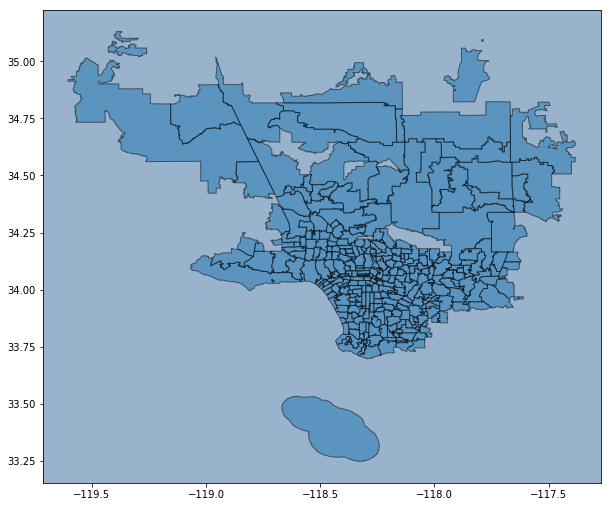

In [78]:
ax = population_zip_merge.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=10)